In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

filepath = '/kaggle/input/o-m-n-i-2/omni_data.csv'
data = pd.read_csv(filepath)
print(data.head())
print(len(data))

/kaggle/input/o-m-n-i-2/omni_data.csv
   Unnamed: 0  year  day  hour  Bartels_rotation_num  id_IMF_sc  \
0           0  1963  1.0   0.0                  1771         99   
1           1  1963  1.0   1.0                  1771         99   
2           2  1963  1.0   2.0                  1771         99   
3           3  1963  1.0   3.0                  1771         99   
4           4  1963  1.0   4.0                  1771         99   

   id_SW_plasma_sc  #IMF_avg  #plasma_avg  field_mag_avg  ...      PF.3  \
0              NaN       999          999          999.9  ...  99999.99   
1              NaN       999          999          999.9  ...  99999.99   
2              NaN       999          999          999.9  ...  99999.99   
3              NaN       999          999          999.9  ...  99999.99   
4              NaN       999          999          999.9  ...  99999.99   

       PF.4      PF.5  flag  ap_index  f10.7_index  PC(N)_index  \
0  99999.99  99999.99   0.0       3.0    

In [11]:
#Data Preprocessing

#Check for missing values
missing_value_count_by_column = (data.isnull().sum())
print(missing_value_count_by_column[missing_value_count_by_column > 0])

non_null_values = data['id_SW_plasma_sc'].dropna()
# Check for infinite values and exclude them if any
finite_values = non_null_values[~non_null_values.isin([float('inf'), float('-inf')])]

# Calculate and display the range
min_value = finite_values.min()
max_value = finite_values.max()

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")
print(f"Range: {max_value - min_value}")



Series([], dtype: int64)
Minimum value: 1.0
Maximum value: 99.0
Range: 98.0


In [12]:
median_value =data['id_SW_plasma_sc'].median()

data['id_SW_plasma_sc'] = data['id_SW_plasma_sc'].fillna(median_value)
print("NaN values have been replaced with the median")

NaN values have been replaced with the median


In [13]:
import pandas as pd
#find categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables")
print(object_cols)

Categorical variables
[]


In [14]:
#Test Train Split
from sklearn.model_selection import train_test_split

# Define the feature variables (X) and target variable (y)
X = data.drop(columns=['#IMF_avg'])  # Replace 'target_variable' with the actual column name
y = data['#IMF_avg']

# Calculate the IMF avg (Interquartile Mean) of the target variable
q1 = y.quantile(0.25)
q3 = y.quantile(0.75)
iqr_mean = y[(y >= q1) & (y <= q3)].mean()

print(f"Interquartile Mean (IMF avg) of the target variable: {iqr_mean}")

# Fill missing values in the target variable with the IMF avg
y = y.fillna(iqr_mean)

# Perform the train-test split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-test split completed.")
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Interquartile Mean (IMF avg) of the target variable: 447.4453292893802
Train-test split completed.
Training set size: 385708
Test set size: 96428


Mutual Information with IMF_avg:
id_IMF_sc                   1.362869
Unnamed: 0                  1.309988
Bartels_rotation_num        1.092016
year                        0.947965
#plasma_avg                 0.929079
id_SW_plasma_sc             0.785996
sigma_|B|                   0.593303
long_angle_avg_field_vec    0.578405
lat_angle_avg_field_vec     0.566916
sigma_B                     0.478804
sigma_theta_V               0.478649
sigma_Bx                    0.476613
field_mag_avg               0.472571
Alfven_mach_num             0.468457
sigma_By                    0.467123
mag_avg_field_vec           0.466797
sigma_Bz                    0.465831
By_GSE                      0.456131
By_GSM                      0.454440
Bx_GSE_GSM                  0.454311
Bz_GSE                      0.449514
Bz_GSM                      0.449251
plasma_flow_lat_angle       0.440686
plasma_beta                 0.439304
magnetosonic_mach num       0.434429
Electric_field              0.431388
proto

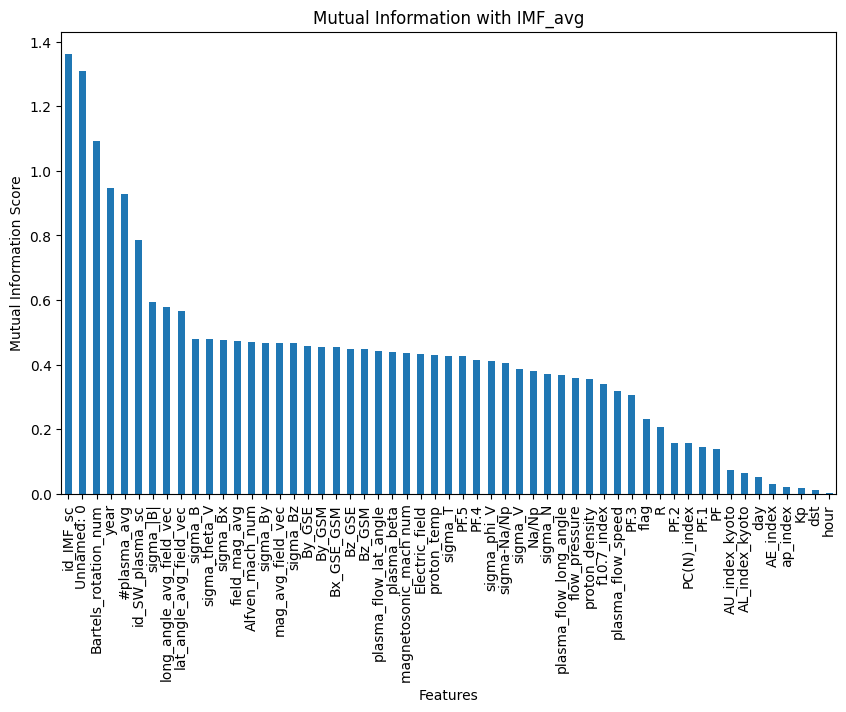

In [20]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt


# Define target_columns correctly
target_columns = ['IMF_avg']  # Replace 'target_variable' with the actual column name(s)

mutual_info_scores = {}
for target in target_columns:
    # Calculate mutual information scores for the target
    mi_scores = mutual_info_regression(X_train, y_train)  # If there are multiple targets, replace 'y_train' with 'y_train[target]'
    mutual_info_scores[target] = pd.Series(mi_scores, index=X_train.columns)

# Print and visualize the mutual information scores
for target, scores in mutual_info_scores.items():
    print(f"Mutual Information with {target}:")
    print(scores.sort_values(ascending=False))
    print("-" * 40)

    # Plot mutual information scores
    scores.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
    plt.title(f"Mutual Information with {target}")
    plt.xlabel("Features")
    plt.ylabel("Mutual Information Score")
    plt.show()


In [23]:
import pandas as pd


# Specify the selected features
selected_features = ['id_IMF_sc', 'Unnamed: 0', 'Bartels_rotation_num', 'year', '#plasma_avg']

# Select the specified features from the DataFrame
selected_data = data[selected_features]

# Display the selected features
print(selected_data.head())  # Display the first few rows to verify the selection


   id_IMF_sc  Unnamed: 0  Bartels_rotation_num  year  #plasma_avg
0         99           0                  1771  1963          999
1         99           1                  1771  1963          999
2         99           2                  1771  1963          999
3         99           3                  1771  1963          999
4         99           4                  1771  1963          999


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


# Split the data into features and target
X = selected_data.drop(columns=['IMF_avg'])  # Exclude the target column
y = selected_data['IMF_avg']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Neural Network model (MLPRegressor)
nn_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),   # Number of neurons in each hidden layer
    max_iter=500,                   # Maximum number of iterations
    random_state=42,                # Set the random state for reproducibility
    early_stopping=True,            # Stop training if validation score is not improving
    validation_fraction=0.1,        # Fraction of training data to set aside for validation
    n_iter_no_change=10,            # Stop training after 10 iterations with no improvement
    solver='adam',                  # Use the Adam optimizer
)

# Train the model using the selected features
nn_model.fit(X_train, y_train)

# Predict the target variable (IMF_avg) for the test set
y_pred = nn_model.predict(X_test)

# Calculate the R-squared value and Mean Absolute Error (MAE)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print(f"Test R-squared: {r2}")
print(f"Test Mean Absolute Error (MAE): {mae}")


In [25]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Use X_train as selected_data
selected_data = X_train[['id_IMF_sc', 'Unnamed: 0', 'Bartels_rotation_num', 'year', '#plasma_avg']]  # Selecting specified features
X_test_selected = X_test[selected_data.columns]  # Align test data columns with selected features

# Define the target variable
y_train_target = y_train
y_test_target = y_test

# Initialize the Neural Network model (MLPRegressor)
nn_model = MLPRegressor(
    hidden_layer_sizes=(256,128,64,32,16,8),   # Hidden layers with 100 and 50 neurons
    max_iter=500,                   # Max iterations
    random_state=42,                # Ensures reproducibility
    early_stopping=True,            # Enable early stopping
    validation_fraction=0.1,        # Fraction of training data for validation
    n_iter_no_change=10,            # Stops training if no improvement in 10 epochs
    solver='adam',                  # Optimizer for faster convergence
)

# Train the model on the selected features
nn_model.fit(selected_data, y_train_target)

# Predict on the test set
y_pred = nn_model.predict(X_test_selected)

# Calculate performance metrics
r2 = r2_score(y_test_target, y_pred)
mae = mean_absolute_error(y_test_target, y_pred)

# Print performance metrics
print(f"Test R-squared: {r2}")
print(f"Test Mean Absolute Error (MAE): {mae}")


Test R-squared: 0.9805252495238751
Test Mean Absolute Error (MAE): 35.093067385805604
